# Part I - US 2008 Flights Exploration
## by Sarah Akinkunmi

## Introduction
> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, for year 2008.


## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# loading data into pandas dataframe
flight_details = pd.read_csv("/content/2008.csv")
flight_details

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
# checking the structure of the data
flight_details.shape

(2389217, 29)

In [5]:
# checking for datatypes and missing values
flight_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [6]:
# observing the first 15 columns of the dataset
flight_details.iloc[0:5, : 17]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,55.0,16.0,18.0,HOU
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,-2.0,8.0,HOU
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,107.0,16.0,23.0,HOU


Issues to be corrected
- Combining `Year`, `Month` and `DayofMonth` columns into one
- Removing unnecessary columns
- Dropping duplicate rows, if any

Saving a copy of the dataset

In [7]:
flight_dets = flight_details.copy()

Combining `Year`, `Month` and `DayofMonth` columns into `Date`

In [8]:
# checking the months to ensure the numbers are between 1 - 12
flight_dets['Month'].unique()

array([1, 2, 3, 4])

> We should note here that there are only 4 months in the data (January to April)

In [9]:
# checking the days to ensure the numbers are between 1 - 31
flight_dets['DayofMonth'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  2,  1])

In [10]:
# converting the variables to strings
flight_dets['Year'] = flight_dets['Year'].astype(str)
flight_dets['Month'] = flight_dets['Month'].astype(str)
flight_dets['DayofMonth'] = flight_dets['DayofMonth'].astype(str)

In [11]:
# checking to ensure data integrity
flight_dets.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [12]:
# making the date column
flight_dets['Date'] = pd.to_datetime(flight_dets['Year'] + '-' + flight_dets['Month'] + '-' + flight_dets['DayofMonth'])

In [13]:
# inserting it into the first column of the dataframe
first_col = flight_dets.pop('Date')
flight_dets.insert(0, 'Date', first_col)

In [14]:
# checking to ensure code worked as expected
flight_dets.head()


,Date,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,2008,1,3,4,1343.0,1325,1451.0,1435,WN,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008-01-03,2008,1,3,4,1125.0,1120,1247.0,1245,WN,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,2008,1,3,4,2009.0,2015,2136.0,2140,WN,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008-01-03,2008,1,3,4,903.0,855,1203.0,1205,WN,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008-01-03,2008,1,3,4,1423.0,1400,1726.0,1710,WN,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


Removing unnecessary columns -`Year`, `Month` and `DayofMonth` and `DayOfWeek`, `TaxiIn`, `TaxiOut`

In [15]:
flight_dets.drop(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'TaxiIn', 'TaxiOut'], axis=1, inplace=True)

In [16]:
# checking to ensure changes
flight_dets.head()

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,...,LIT,393,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008-01-03,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,...,MAF,441,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,...,MAF,441,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008-01-03,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,...,MCO,848,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008-01-03,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,...,MCO,848,0,NaN,0,16.0,0.0,0.0,0.0,0.0


Dropping duplicate rows

In [17]:
flight_dets.drop_duplicates(inplace=True)

In [18]:
# checking to see if any records were dropped
flight_dets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389213 entries, 0 to 2389216
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   DepTime            float64       
 2   CRSDepTime         int64         
 3   ArrTime            float64       
 4   CRSArrTime         int64         
 5   UniqueCarrier      object        
 6   FlightNum          int64         
 7   TailNum            object        
 8   ActualElapsedTime  float64       
 9   CRSElapsedTime     float64       
 10  AirTime            float64       
 11  ArrDelay           float64       
 12  DepDelay           float64       
 13  Origin             object        
 14  Dest               object        
 15  Distance           int64         
 16  Cancelled          int64         
 17  CancellationCode   object        
 18  Diverted           int64         
 19  CarrierDelay       float64       
 20  WeatherDelay       float

In [19]:
airport = pd.read_csv("/content/airports.csv")
airport.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [20]:
carriers = pd.read_csv("/content/carriers.csv")
carriers

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1486,ZW,Air Wisconsin Airlines Corp
1487,ZX,Air Georgian
1488,ZX (1),Airbc Ltd.
1489,ZY,Atlantic Gulf Airlines


In [21]:
airplane_data = pd.read_csv("/content/plane-data.csv")
airplane_data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
vars_description = pd.read_csv("/content/variable-descriptions.csv")
vars_description

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


### What is the structure of your dataset?

> The dataset consists of 29 features and more than 2 million records. More information about the features (columns) definition can be found in the `vars_description` dataframe.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in exploring features that really correlate with delayed flights 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features I think will help support my investigation are the 
- the causes of delays - `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`. I expect Weather to be a major cause
- the `Distance` covered
- if a particular airline is associated with more delays (`UniqueCarrier`)
- differences between the actual elapsed and scheduled elapse times, `ActualElapsedTime` and  `CSRElapsedTime` which indicate the delay time in minutes


## Univariate Exploration

In [23]:
# since blue is the most common brand colour for airlines in the usa (https://apex.aero/articles/logochromatic-airline-brand-colors-region/), that would be the main colour
main_color = sb.color_palette()[0]

## Question: What are the most common states flights depart from? 

## Visualization

In [24]:
# selecting the top 10 cities to reduce noise
order = flight_dets['Origin'].value_counts()[:10].index

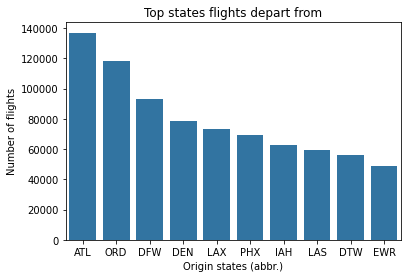

In [26]:
# plotting the data
sb.countplot(data = flight_dets, x = 'Origin', color = main_color, order = order);
plt.title("Top states flights depart from")
plt.xlabel("Origin states (abbr.)")
plt.ylabel("Number of flights");

## Observation

> Atlanta is the state most flights depart from

## Question: What are the most common states flights head to?

## Visualization

In [27]:
# selecting the top 10 cities
order = flight_dets['Dest'].value_counts()[:10].index

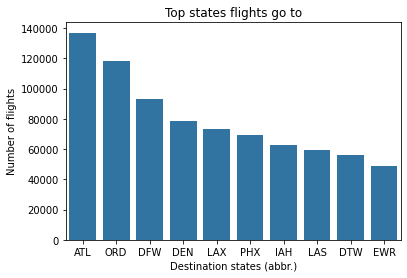

In [28]:
sb.countplot(data = flight_dets, x = 'Dest', color = main_color, order = order);
plt.title("Top states flights go to")
plt.xlabel("Destination states (abbr.)")
plt.ylabel("Number of flights");

## Observation

> Atlanta is the state most flights return to. Looking back at the visualization of where flights move from, the top 10 cities are the same as this.

## Question: What are the most common airlines for the 2008 flights?

## Visualization

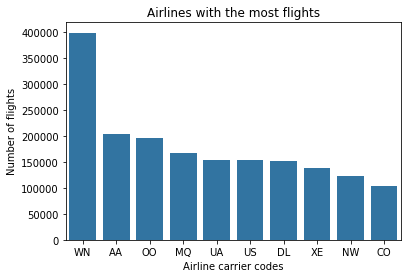

In [29]:
# selecting the top 10 airlines
order = flight_dets['UniqueCarrier'].value_counts()[:10].index
sb.countplot(data = flight_dets, x = 'UniqueCarrier', color = main_color, order = order);
plt.title("Airlines with the most flights")
plt.xlabel("Airline carrier codes")
plt.ylabel("Number of flights");

## Observation
> Southwest Airlines Co. is our most used Airline. American Airlines Inc. comes in second

## Question: What month(s) have the most flights?

## Visualization

In [30]:
# Extracting the months from the date variable
flight_dets['Month'] = flight_dets['Date'].dt.month_name()

In [31]:
# Converting month to categorical variable to ensure order
ordered_months = pd.api.types.CategoricalDtype(categories=flight_dets['Month'].unique(), ordered=True)
flight_dets['Month'] = flight_dets['Month'].astype(ordered_months)

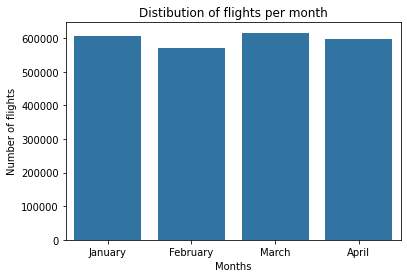

In [32]:
# plotting the data
sb.countplot(data = flight_dets, x = 'Month', color = main_color);
plt.title("Distibution of flights per month");
plt.xlabel("Months");
plt.ylabel("Number of flights");

## Observation: 
> March has the most flights, perhaps due to Easter which held on March 23. To confirm if this is true, I'll plot the distribution of flights in March

## Question: Do most of the flights in March occur around Easter (March 16 - March 25)? 

## Visualization

In [33]:
# making a separate dataframe with the days in March
march = flight_dets[(flight_dets['Date'] >= '2008-03-01') & (flight_dets['Date'] < '2008-04-01')]

In [34]:
march.sort_values(by='Date')

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month
1628055,2008-03-01,607.0,603,729.0,737,NW,1425,N677MC,82.0,94.0,...,369,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1298291,2008-03-01,1247.0,1255,1409.0,1407,XE,2304,N14938,82.0,72.0,...,376,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1430092,2008-03-01,1732.0,1735,1914.0,1929,UA,1427,N460UA,102.0,114.0,...,602,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1704429,2008-03-01,1454.0,1455,1751.0,1800,AA,2033,N4WYAA,237.0,245.0,...,1391,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1601382,2008-03-01,1146.0,1035,1326.0,1240,MQ,4854,N712AE,100.0,125.0,...,501,0,NaN,0,0.0,0.0,0.0,0.0,46.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603005,2008-03-31,1141.0,1115,1408.0,1233,NW,115,N528US,267.0,198.0,...,1276,0,NaN,0,23.0,0.0,69.0,0.0,3.0,March
1559490,2008-03-31,1716.0,1720,1804.0,1811,HA,360,N477HA,48.0,51.0,...,216,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1267365,2008-03-31,601.0,600,846.0,835,WN,121,N408WN,105.0,95.0,...,588,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1267373,2008-03-31,2101.0,2010,2316.0,2230,WN,214,N791SW,75.0,80.0,...,448,0,NaN,0,13.0,0.0,0.0,0.0,33.0,March


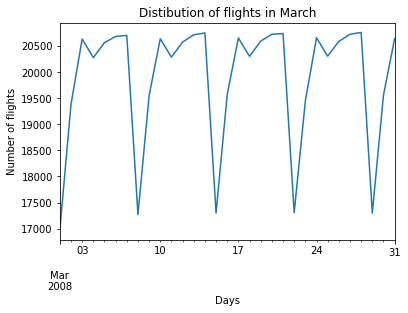

In [35]:
# plotting the data
march.groupby(march['Date'])['UniqueCarrier'].size().plot();
plt.title("Distibution of flights in March")
plt.xlabel("Days")
plt.ylabel("Number of flights");

## Observation: 
> The distribution is fairly the same throughout the month

## Question: Were the flights over more longer distances than short distances?

## Visualization

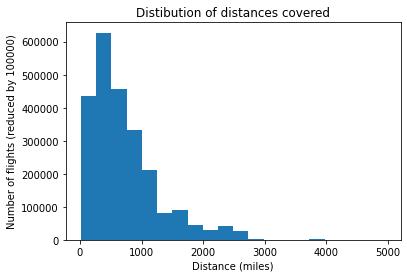

In [56]:
plt.hist(flight_dets['Distance'], bins=20, color=main_color);
plt.title("Distibution of distances covered")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of flights (reduced by 100000)");

## Observation
> Most flights covered short distances (< 1000 miles)

## Question: Did the 2008 flights have more short delays than long delays?

## Visualization

In [36]:
# creating new variable calculating the delay time in minutes
flight_dets['delay_time'] = flight_dets['ActualElapsedTime'] - flight_dets['CRSElapsedTime']

In [37]:
flight_dets['delay_time'].describe()

count    2.319117e+06
mean    -1.115588e+00
std      1.420628e+01
min     -1.510000e+02
25%     -9.000000e+00
50%     -3.000000e+00
75%      5.000000e+00
max      5.700000e+02
Name: delay_time, dtype: float64

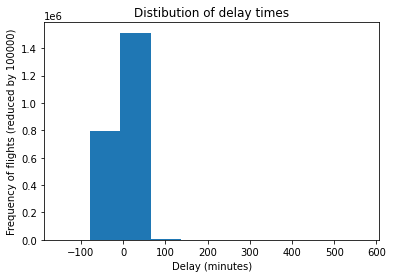

In [42]:
# plotting the data
plt.hist(flight_dets['delay_time'], bins=10, color=main_color);
plt.title("Distibution of delay times")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency of flights (reduced by 100000)");

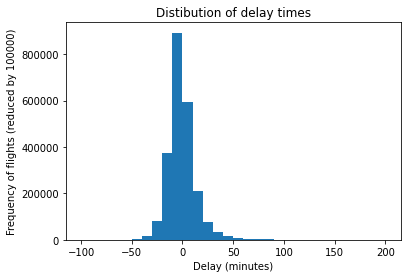

In [43]:
# zooming in on the peak
bins = np.arange(-100, 200 + 10, 10)
plt.hist(flight_dets['delay_time'], bins=bins, color=main_color);
plt.title("Distibution of delay times")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency of flights (reduced by 100000)");

## Observation
> More than 100,000 flights were earlier than expected and long delays over 50 minutes are less frequent

## Question: What type of delay caused the most delays?

## Visualization

In [44]:
# statistical description of the numerical variables
flight_dets.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_time
count,2.324771e+06,2.389213e+06,2.319117e+06,2.389213e+06,2.389213e+06,2.319117e+06,2.388806e+06,2.319117e+06,2.319117e+06,2.324771e+06,2.389213e+06,2.389213e+06,2.389213e+06,584581.000000,584581.000000,584581.000000,584581.000000,584581.000000,2.319117e+06
mean,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213890e+03,1.286188e+02,1.293775e+02,1.051016e+02,1.027355e+01,1.143634e+01,7.261584e+02,2.697206e-02,2.366470e-03,15.752934,2.938253,16.158442,0.080459,20.976782,-1.115588e+00
std,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951393e+03,7.025303e+01,6.948246e+01,6.766801e+01,3.963431e+01,3.653231e+01,5.571763e+02,1.620018e-01,4.858879e-02,40.035534,19.166694,30.534190,1.742582,38.617200,1.420628e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-9.100000e+01,-9.200000e+01,1.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.510000e+02
25%,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,8.000000e+01,5.600000e+01,-9.000000e+00,-4.000000e+00,3.250000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000e+00
50%,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,1.110000e+02,8.700000e+01,0.000000e+00,0.000000e+00,5.830000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000,-3.000000e+00
75%,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,1.600000e+02,1.340000e+02,1.500000e+01,1.100000e+01,9.570000e+02,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000,5.000000e+00
max,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,1.435000e+03,8.860000e+02,2.461000e+03,2.467000e+03,4.962000e+03,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000,5.700000e+02


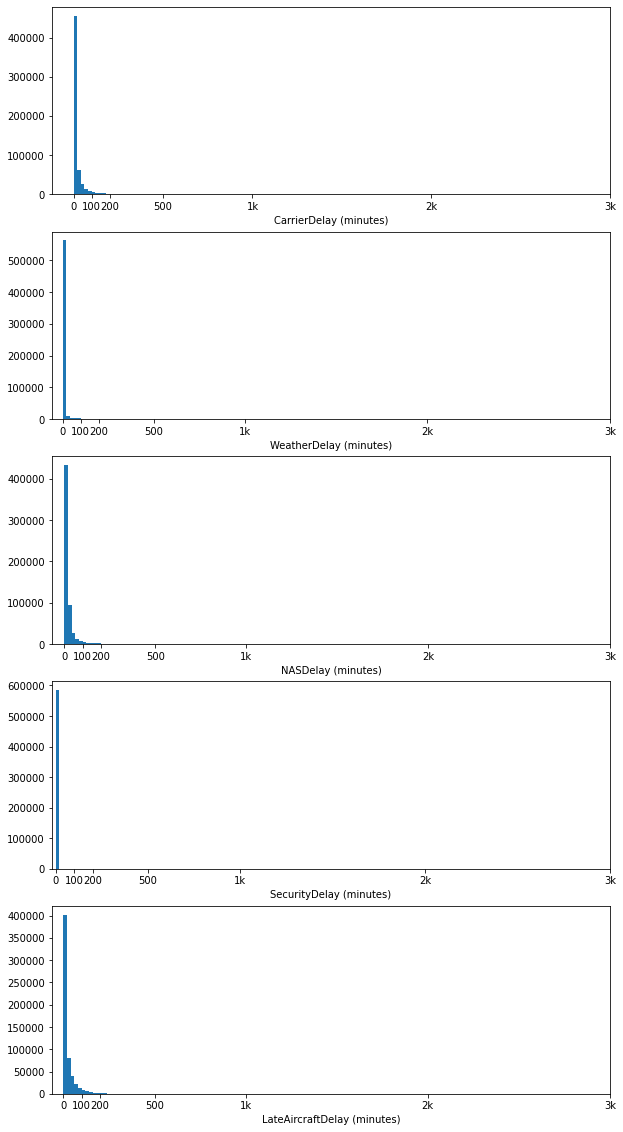

In [52]:
# plotting the distribution of each delay cause
fig, ax = plt.subplots(nrows=5, figsize = [10, 20])
variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
ticks = [0, 100, 200, 500, 1000, 2000, 3000]

for _ in range(len(variables)):
  var = variables[_]
  bins = np.arange(min(flight_dets[var]), max(flight_dets[var]) + 20, 20)
  ax[_].hist(data = flight_dets, x = var, bins = bins)
  ax[_].set_xlabel('{} (minutes)'.format(var))
  ax[_].set_xticks(ticks, [0, 100, 200, 500, '1k', '2k', '3k'])

plt.show()

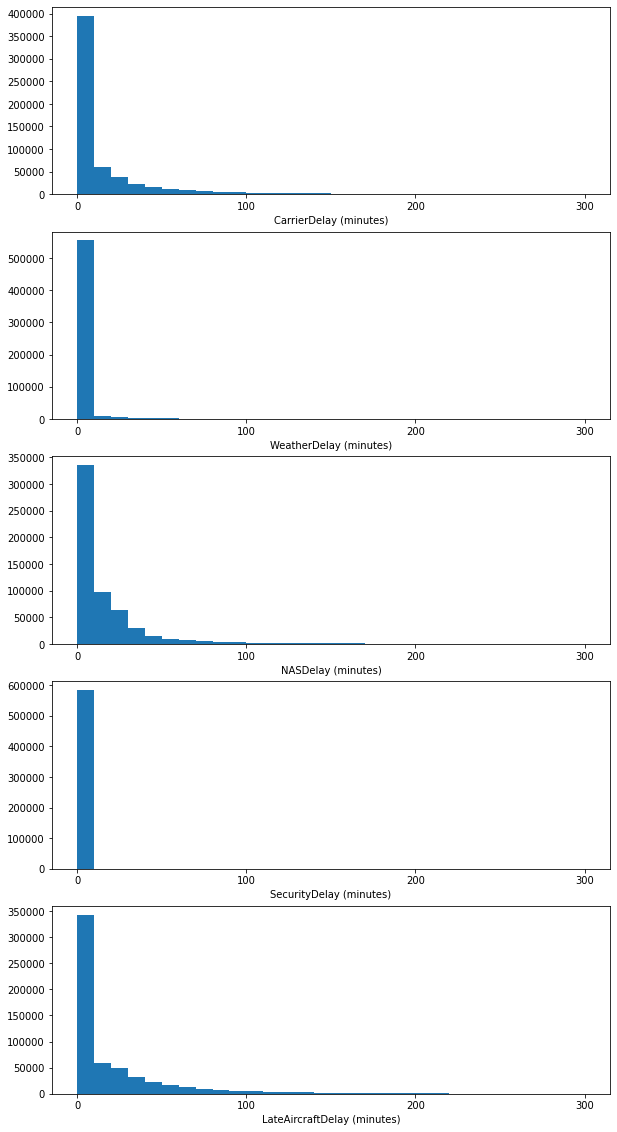

In [54]:
# zooming in on the distributions
fig, ax = plt.subplots(nrows=5, figsize = [10, 20])
variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
ticks = [0, 100, 200, 300]

for _ in range(len(variables)):
  var = variables[_]
  bins = np.arange(min(flight_dets[var]), 300 + 10, 10)
  ax[_].hist(data = flight_dets, x = var, bins = bins)
  ax[_].set_xlabel('{} (minutes)'.format(var))
  ax[_].set_xticks(ticks)

plt.show()

## Observation
> Security delays are the least common cause of delays  
> Late aircrafts are the most common delay causes followed by the National Airport System delays

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Unexpectedly I noticed
> - The flights covered more short distances (< 1000 miles)
> - Most of the flights were in fact earlier than expected
> - Late aircrafts were the most common causes of delays.  

> I only needed to perform scaling transforms to zoom into the distributions of the numerical variables

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the numerical variables, `Distance`, `delay_time` and the delay causes, I noticed a number of outliers. Hence, I focused on the rest.

## Bivariate Exploration



## Question: What months have the most delays?

## Visualization

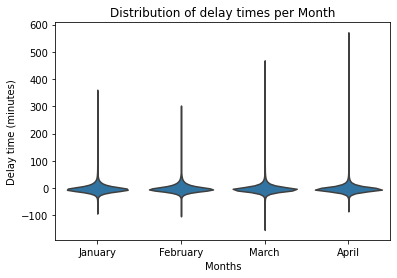

In [76]:
# plotting the data
sb.violinplot(data=flight_dets, x='Month', y='delay_time', color=main_color, inner=None);
plt.title('Distribution of delay times per Month')
plt.xlabel('Months')
plt.ylabel('Delay time (minutes)');

## Observation

Most of the flights in all the months are either on-time or earlier than expected. However, April has the most delays

## Question: Are some flights associated with more delays 

## Visualization

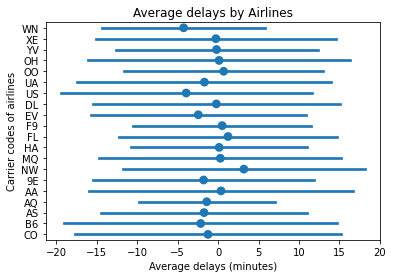

In [77]:
sb.pointplot(data=flight_dets, x='delay_time', y='UniqueCarrier', color=main_color, ci='sd', linestyles="");
plt.title("Average delays by Airlines")
plt.xlabel("Average delays (minutes)")
plt.ylabel("Carrier codes of airlines");

## Observation

Northwest Airlines Inc. (NW) have the most average delays, followed by AirTran Airways Corporation (FL), Frontier Airlines Inc. (F9). I will like to explore what the common cause of delay is for these three airlines

## Question: Do longer distances lead to longer delays?

## Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


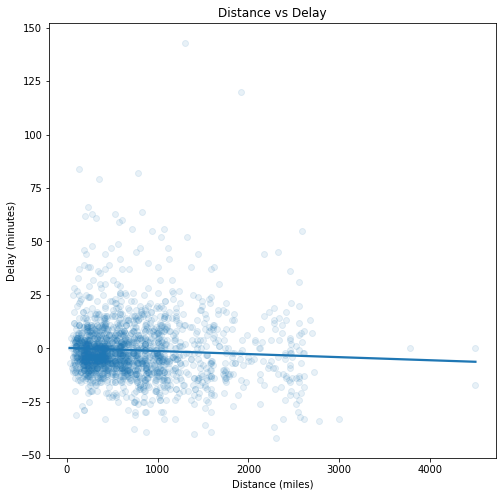

In [80]:
# plotting the data
plt.figure(figsize=[8,8])
sample = np.random.choice(flight_dets.shape[0], 2000, replace=False)
flight_samp = flight_dets.loc[sample, :]
sb.regplot(flight_samp['Distance'], flight_samp['delay_time'], x_jitter=0.3, scatter_kws={'alpha':1/10}, ci=None);
plt.title('Distance vs Delay')
plt.xlabel('Distance (miles)')
plt.ylabel("Delay (minutes)");
plt.show()

## Observation

There is a slight negative correlation between delay and distance.

## Question: Which delay causes caused longer delays?

## Visualization

In [ ]:
variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

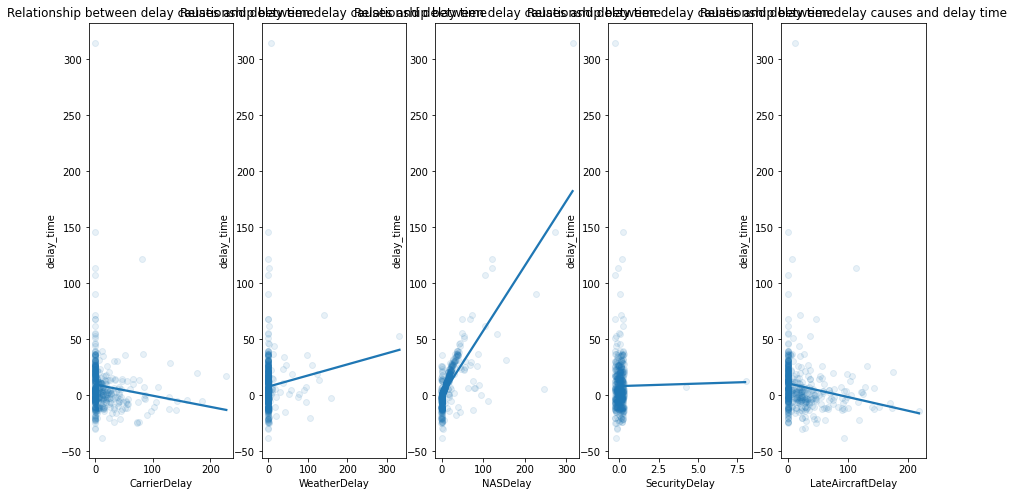

In [84]:
# sample 2000 flights so plots load faster
sample = np.random.choice(flight_dets.shape[0], 2000, replace=False)
flight_samp = flight_dets.loc[sample, :]

x = 1
plt.figure(figsize=[15,8])
for _ in variables:
  plt.subplot(1, 5, x)
  sb.regplot(flight_samp[_], flight_samp['delay_time'], x_jitter=0.3, scatter_kws={'alpha':1/10}, ci=None);
  x += 1

## Observation
> Delay time shows a strong positive correlation wit NASDelay but a strong negative correlation with Carrier and Late Aircraft delays. There is a weak negative correlation between Delay time and Weather and Security delays

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Question:

## Visualization

## Observation

## Question:

## Visualization

## Observation

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

